### 결측치처리

In [1]:
MCAR; Missing Completely At Random: 완전 무작위 결측
; 편향X, 제거 가능한 유일한 결측치!!
MAR; Missing At Random: 무작위 결측; 관련feature에 대해 sorting했을 때, 1개의 특정구간에서만 결측치?!
; 편향O, 상관관계O--추정--대체 가능
MNAR; Missing Not At Random: 비무작위 결측; 관련feature에 대해 sorting했을 때, 여러 특정구간에서 결측치?!
; 편향O, 상관관계O, 추정불가능, '결측치 발생 원인' 조사필요

In [ ]:
단순대체법
Explicit Modeling
 Mean imputation; 표본오차 축소(왜곡), 검정력 약화
 Regression "; 잔차 축소(왜곡), R² 증가(왜곡)
 Stochastic regression "; random error term을 추가, 표본오차 과소 추정 문제..
Implicit Modeling
 Hot deck ":이 안에 있는 비슷한 값들 중 랜덤샘플링 후 복사; 값의 범위 한정되어야!
 Cold deck ": 외부에 있는 비슷한 자료에서 특정 규칙으로 값 복사

In [2]:
import pandas as pd
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('penguins')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [4]:
#데이터 feature, 속성, 결측치
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


GridSpec(6, 3)

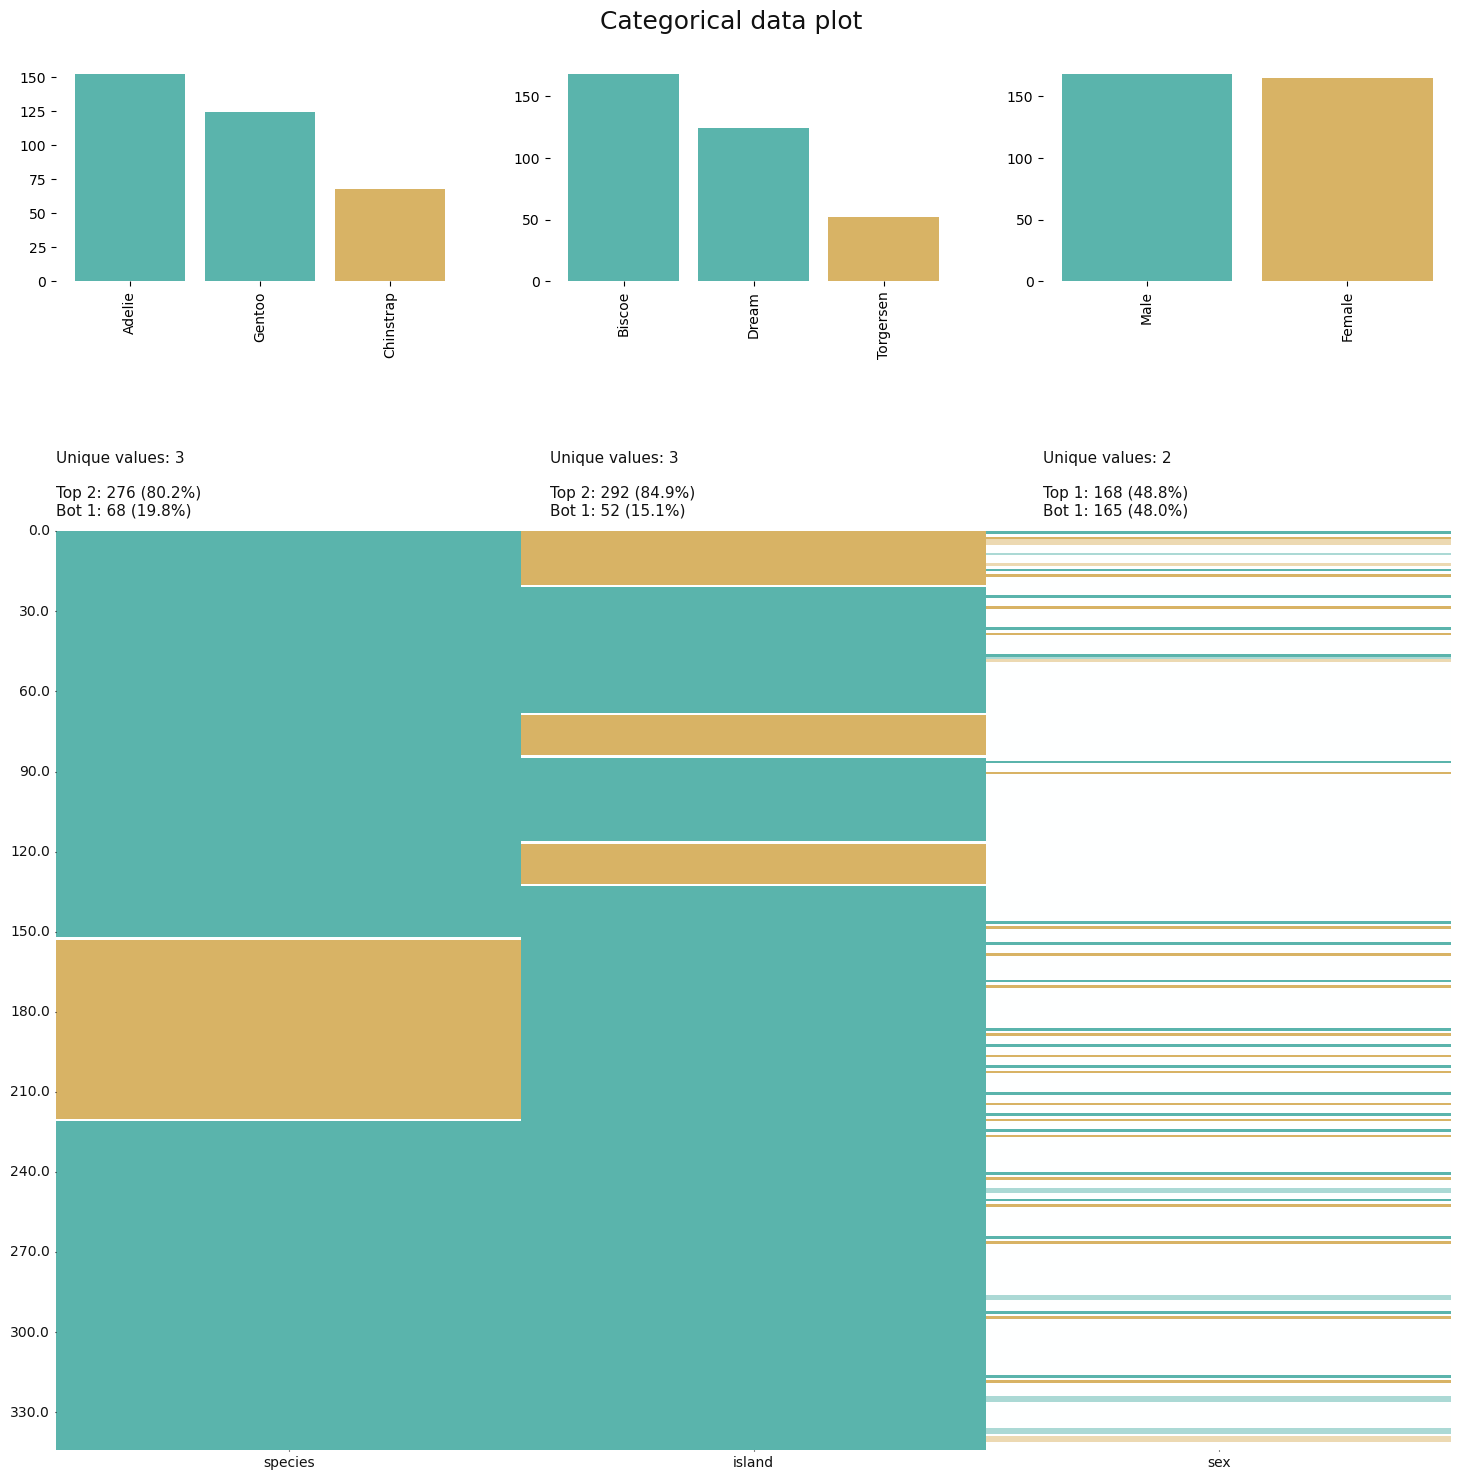

In [5]:
#categorical(dtype=object) data의 구성
import klib
import warnings
warnings.filterwarnings(action='ignore')
klib.cat_plot(df)

### 결측치 파악

In [6]:
#isnull().sum(); 각 col에 대한 결측치 개수
df.isnull().sum(axis=0) #axis=:0; 열벡터 단위, =1; 행벡터 단위

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Displaying only columns with missing values.


GridSpec(6, 6)

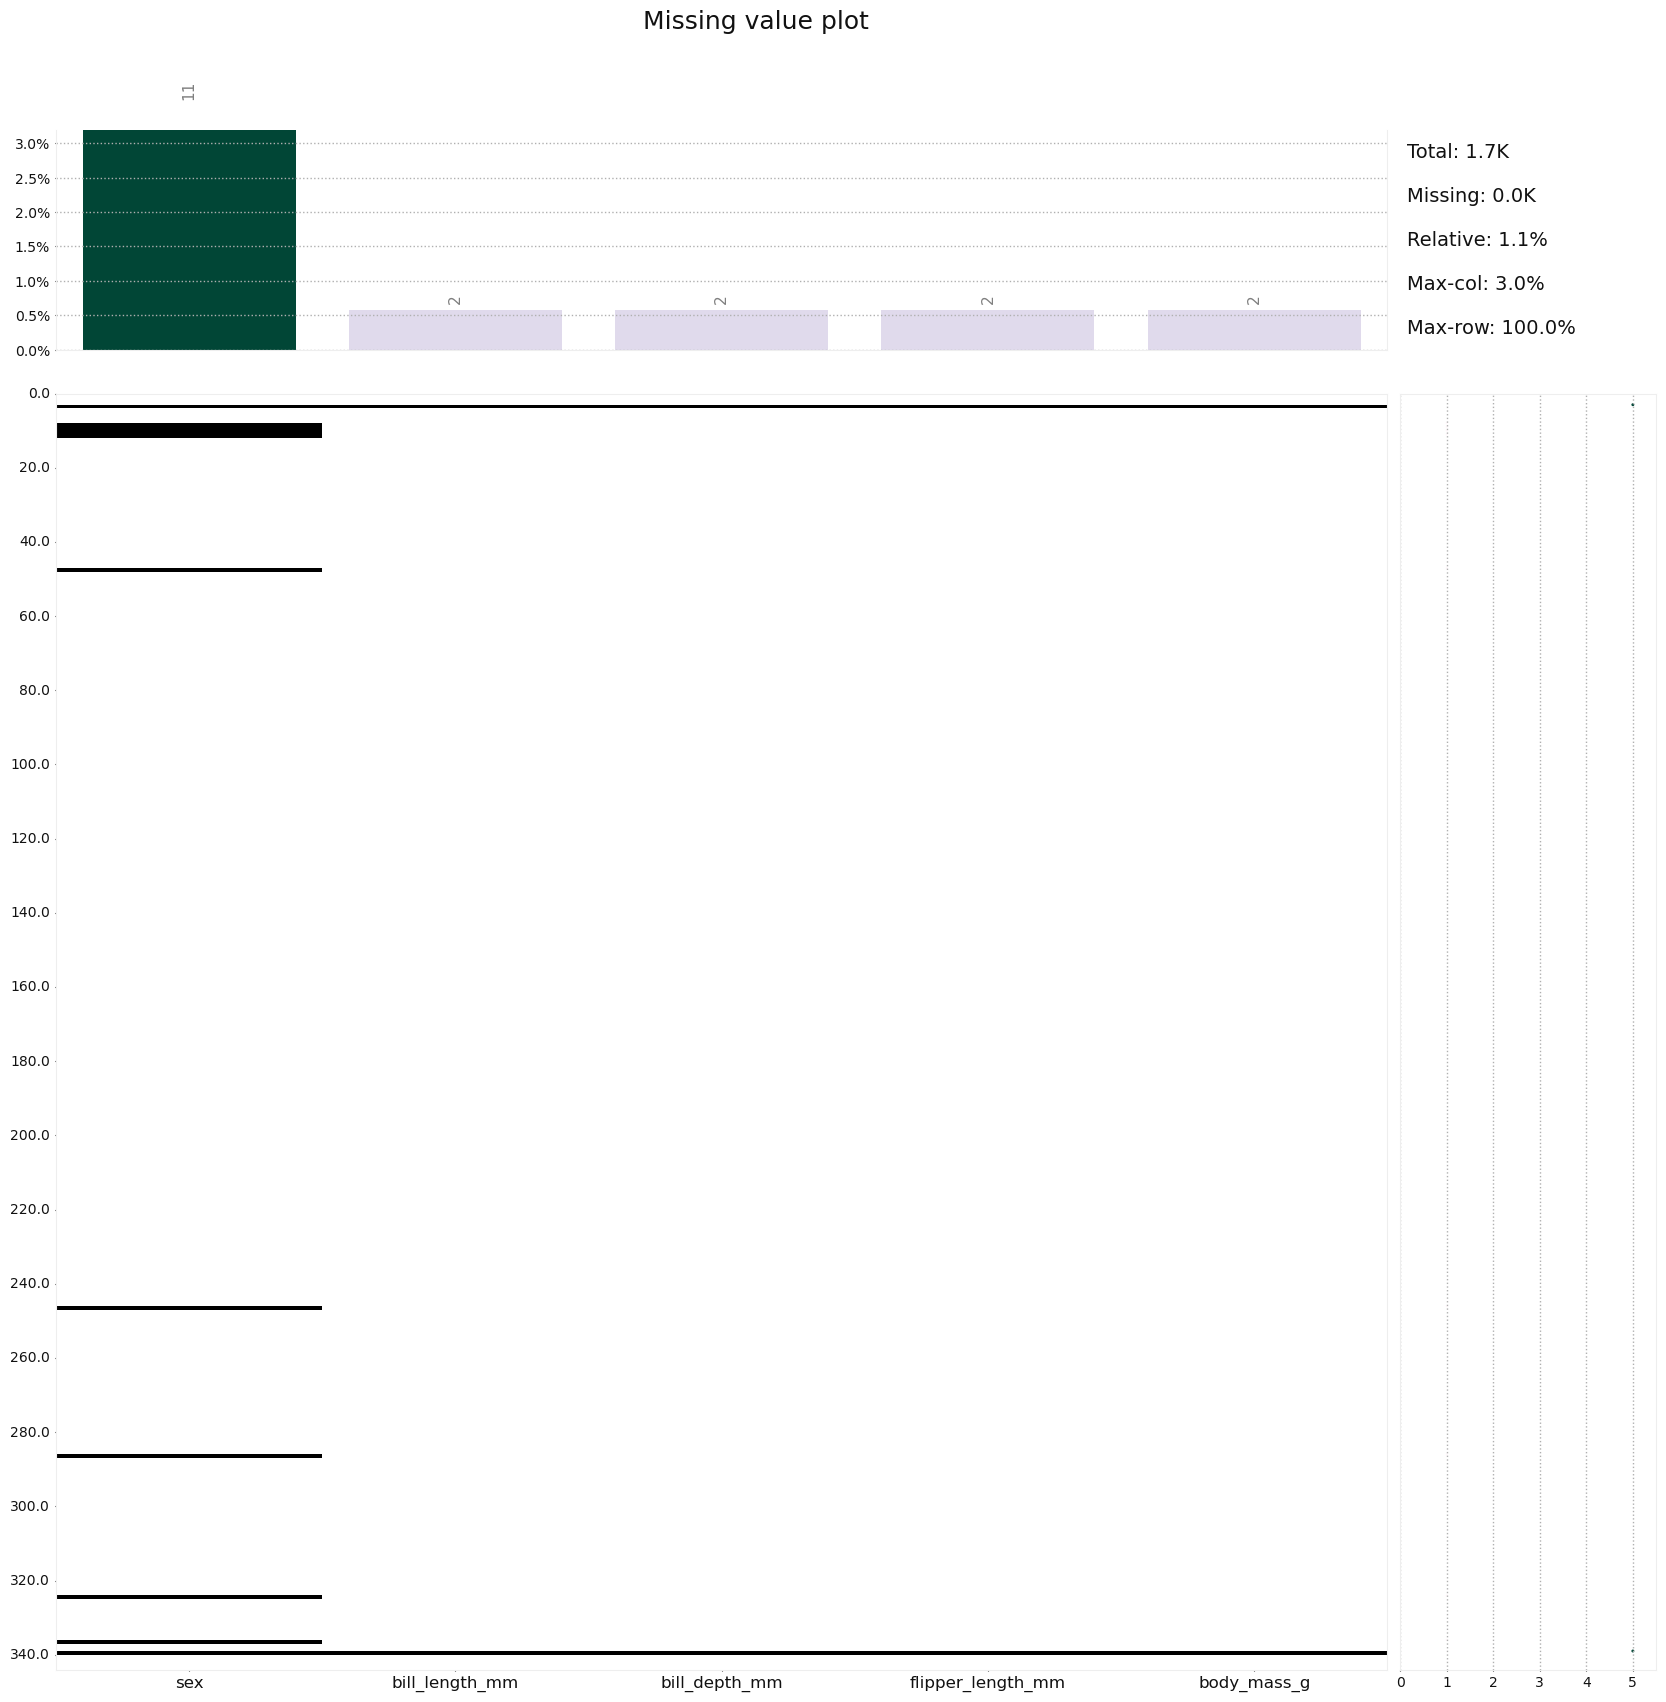

In [7]:
#klib; sort=True: 결측치가 있는 col에 대해서만 프로파일링
klib.missingval_plot(df,sort=True)

### 결측치 Deletion; MCAR
#### : Listwise(결측치가 존재하는 행) OR Pairwise(특정 col에 결측치가 존재하는 행)

In [8]:
df_listwise=df.dropna()
df_pairwise=df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g', 'sex'])

print(f'Original Data:\n {df}\n')
print(f'Listwise deletion:\n {df_listwise}\n')
print(f'Pairwise deletion:\n {df_pairwise}\n')

Original Data:
     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0 

### 결측치 imputation
#### ①결측치 위치 추론; numerical data의 분포에서 비어있는 곳?!

In [37]:
#참고!! 결측치 존재하는 index 찾기
df[df['flipper_length_mm'].isnull()].index

Int64Index([3, 339], dtype='int64')

<AxesSubplot: xlabel='bill_length_mm', ylabel='Density'>

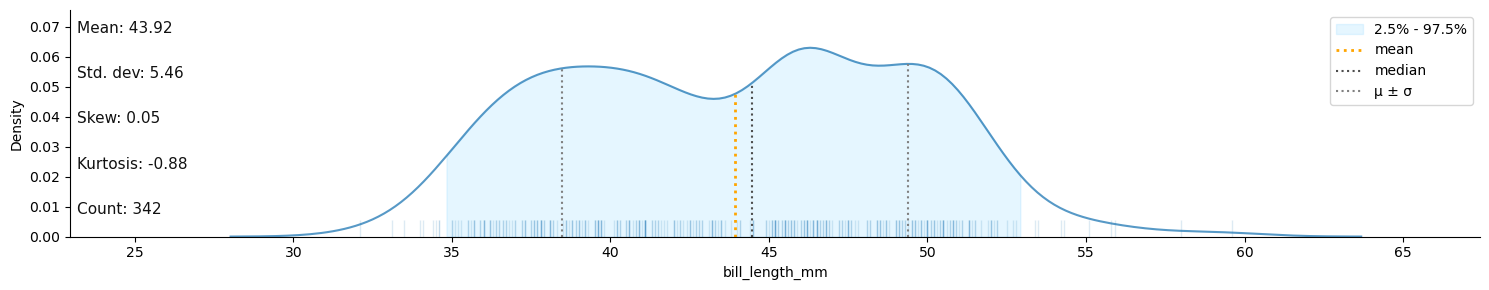

In [9]:
klib.dist_plot(df.bill_length_mm) #중간 영역에 결측치?! 평균!!

<AxesSubplot: xlabel='bill_depth_mm', ylabel='Density'>

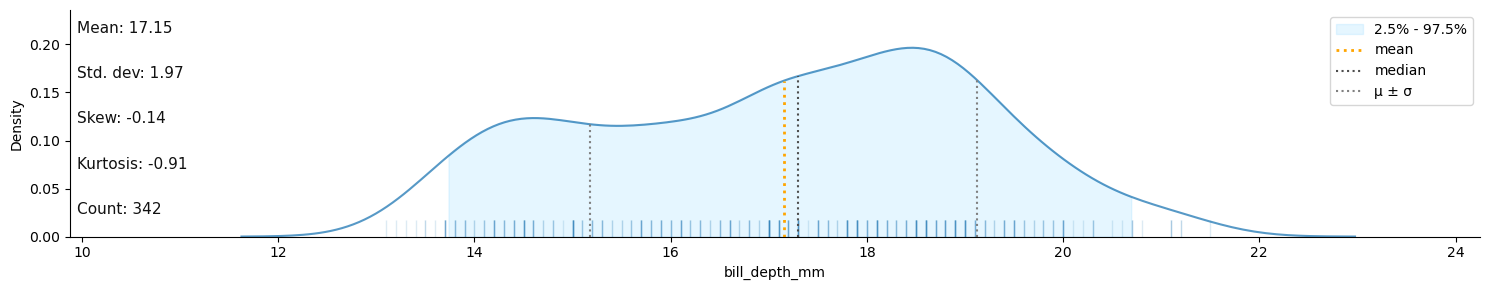

In [10]:
klib.dist_plot(df.bill_depth_mm) #낮은 영역에 결측치?! 중앙값!!

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

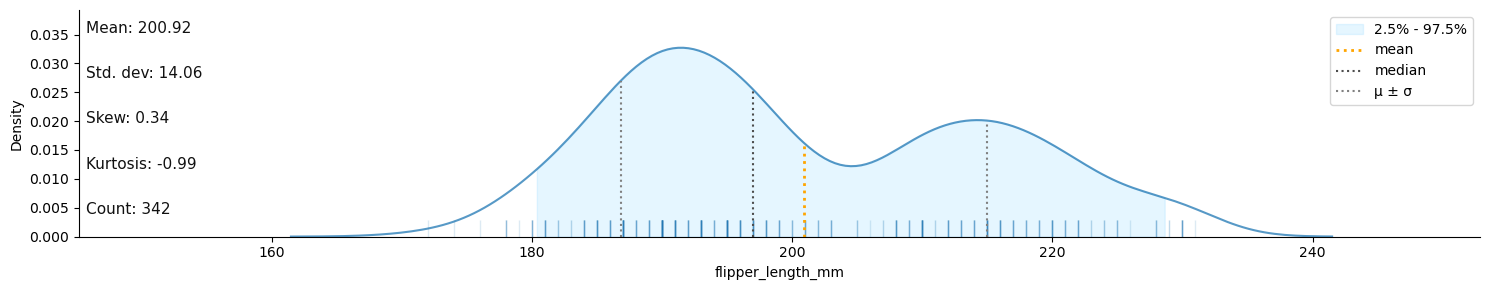

In [11]:
klib.dist_plot(df.flipper_length_mm) #높은 영역에 결측치?! 평균!!

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

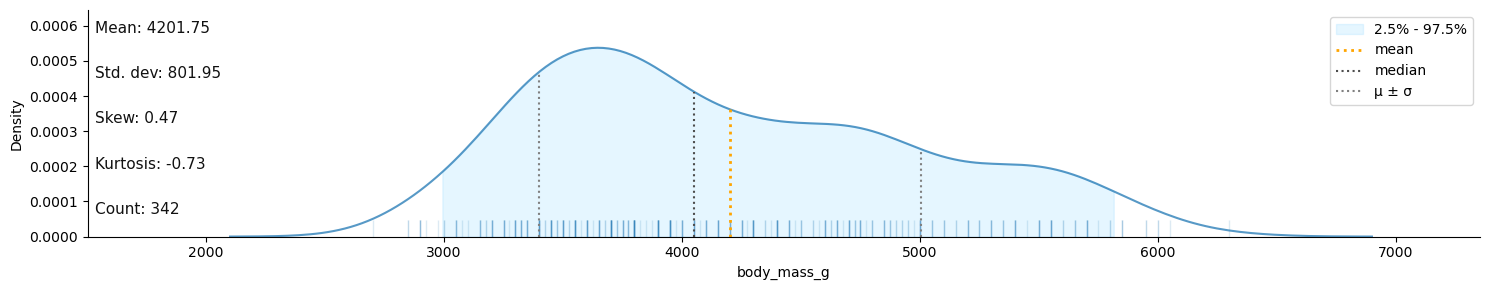

In [12]:
klib.dist_plot(df.body_mass_g)  #높은 영역에 결측치?! 중앙값!!

#### ②결측치 대체; 상관관계 → sorting

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

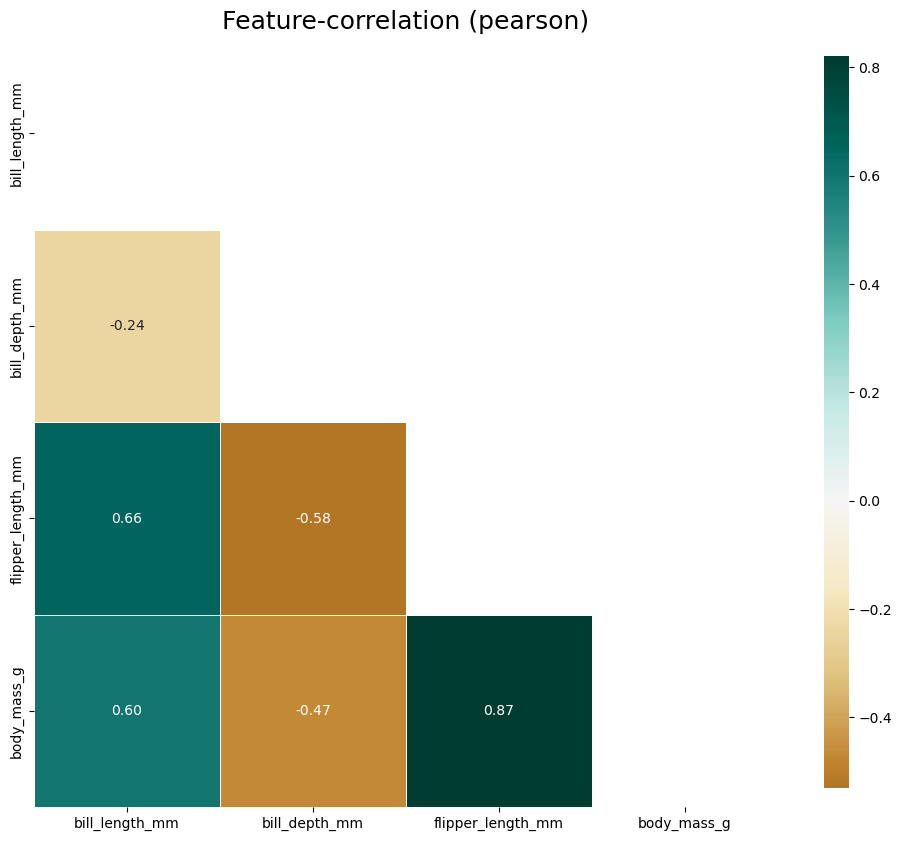

In [13]:
klib.corr_plot(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…


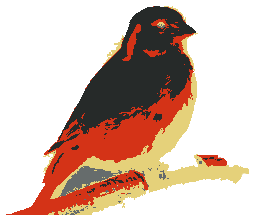

In [14]:
import pygwalker as pyg
gwalker=pyg.walk(df).display_on_jupyter()

In [15]:
#강한 상관관계를 가지는 feature 중 하나를 기준으로 sorting
df.sort_values(by='flipper_length_mm',axis=0)  

#결측치(sex제외):'MAR'일 가능성이 높다!!
#sex: 'MNAR'일 가능성이 높다!!

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
28   Adelie     Biscoe            37.9           18.6              172.0   
20   Adelie     Biscoe            37.8           18.3              174.0   
122  Adelie  Torgersen            40.2           17.0              176.0   
31   Adelie      Dream            37.2           18.1              178.0   
30   Adelie      Dream            39.5           16.7              178.0   
..      ...        ...             ...            ...                ...   
285  Gentoo     Biscoe            49.8           16.8              230.0   
333  Gentoo     Biscoe            51.5           16.3              230.0   
283  Gentoo     Biscoe            54.3           15.7              231.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g     sex  
28        3150.0  Female  
20        3400.0  Female  
122       3450.0  Female  
31        3900.0    Male  
30        3250.0  Female  
..           ...     ...  
285       5700.0    Male  
333       5500.0    Male  
283       5650.0    Male  
3            NaN     NaN  
339          NaN     NaN  

[344 rows x 7 columns]

#### ③ 단순대체법; 비대칭: '중앙값', 가운데가 패여: '평균', 선형관계O: '회귀'

In [61]:
from sklearn.impute import SimpleImputer
df_imputed=pd.DataFrame.copy(df)

#bill_length_mm:'평균'으로 대체
df_imputed[['bill_length_mm']]=SimpleImputer(strategy='mean').fit_transform(df[['bill_length_mm']])

#bill_depth_mm: '중앙값'으로 대체
df_imputed[['bill_depth_mm']]=SimpleImputer(strategy='median').fit_transform(df[['bill_depth_mm']])

In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np

idx=df[df['flipper_length_mm'].isnull()].index #결측치 위치
idx0=list(set(range(344))-set(idx)) #결측치가 아닌 값들의 위치
X_train, X_test, y_train = df.[['bill_length_mm']][idx], df[['bill_length_mm']][idx0], df[['flipper_length_mm']][idx]

#flipper_length_mm': 'bill_length_mm'로 stochastic regression으로 대체
lm = LinearRegression().fit(X_train, y_train)
df_imputed[['flipper_length_mm']][idx] = lm.predict(X_test) + 5*np.random.rand(4,1)

#sex: 타 feature와 상관관계를 찾기 힘든 categorical data는 hot deck으로 대체
df_imputed[['sex']].fillna(value=random.choices(['Male','Female']),inplace=True)

df_imputed

SyntaxError: invalid syntax (3152302761.py, line 6)

#### ④ MICE ⊂ 다중대체법

In [64]:
import numpy as np
# scikit-learn에서 R의 MICE 패키지를 따라서 실험적으로 개발 중
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train = [[33, np.nan, .153], [18, 12000, np.nan], [np.nan, 13542, .125]]
X_test = [[45, 10300, np.nan], [np.nan, 13430, .273], [15, np.nan, .165]]

mice = IterativeImputer(max_iter=10, random_state=0)
mice.fit(X_train)

np.set_printoptions(precision=5, suppress=True)
print('X_train MICE: \n', mice.transform(X_train))
print('X_test MICE: \n', mice.transform(X_test))

X_train MICE: 
 [[   33.      12770.99952     0.153  ]
 [   18.      12000.          0.181  ]
 [   48.00002 13542.          0.125  ]]
X_test MICE: 
 [[   45.      10300.          0.2427 ]
 [   45.82103 13430.          0.273  ]
 [   15.      11845.80217     0.165  ]]


#### ⑤ KNN대체법: 가장 가까운 이웃 k개로 [범주형] 최빈값, [연속형] 중앙값으로 대체

In [65]:
import numpy as np
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=2, weights="uniform")
knn.fit(X_train)

print('X_train KNN: \n', knn.transform(X_train))
print('X_test KNN: \n', knn.transform(X_test))

X_train KNN: 
 [[   33.    12771.        0.153]
 [   18.    12000.        0.139]
 [   25.5   13542.        0.125]]
X_test KNN: 
 [[   45.    10300.        0.139]
 [   25.5   13430.        0.273]
 [   15.    12771.        0.165]]
